Predicting Shopping Mall Sales. You will have to create a model to predict
revenue. Identify the model with the best params. Target Column -
Revenue. Please note: Visualisation is mandatory. You will receive 0 marks
if you do not add visualisation. Data Link -
https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv

# Import the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
data = pd.read_csv("Shopping_Revenue.csv")
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


# Data processing

In [3]:
data.shape

(137, 43)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [5]:
data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [6]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [7]:
data['P6'].fillna(data['P6'].median(), inplace=True)
data['P7'].fillna(data['P7'].median(), inplace=True)

In [8]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [9]:
data["City Group"].unique()

array(['Big Cities', 'Other'], dtype=object)

In [10]:
data["Type"].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [12]:
data["City"] = le.fit_transform(data["City"])
data["City Group"] = le.fit_transform(data["City Group"])
data["Type"] = le.fit_transform(data["Type"])

In [13]:
data = data.drop(["Id","Open Date"],axis=1)

In [14]:
data.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,31,0,2,4,5.0,4.0,4.0,2,2.0,5.0,...,3.0,5,3,4,5,5,4,3,4,5653753
1,3,0,1,4,5.0,4.0,4.0,1,2.0,5.0,...,3.0,0,0,0,0,0,0,0,0,6923131
2,10,1,2,2,4.0,2.0,5.0,2,3.0,5.0,...,3.0,0,0,0,0,0,0,0,0,2055379
3,28,1,2,6,4.5,6.0,6.0,4,4.0,10.0,...,7.5,25,12,10,6,18,12,12,6,2675511
4,14,1,2,3,4.0,3.0,4.0,2,2.0,5.0,...,3.0,5,1,3,2,3,4,3,3,4316715


# Data Visualization

# Checking data for any insights

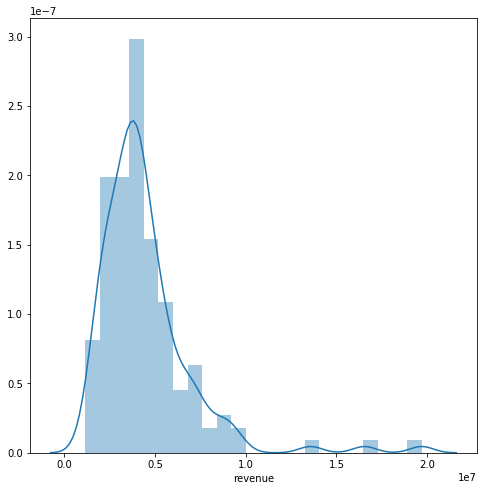

In [15]:
plt.figure(figsize = (8,8))
sns.distplot(data['revenue'])
plt.show()

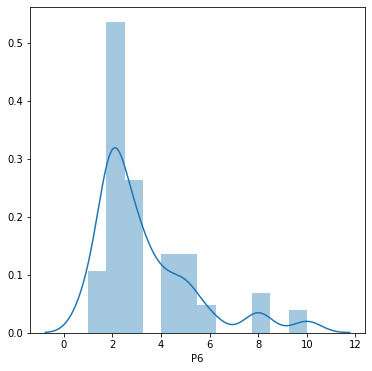

In [16]:
plt.figure(figsize = (6,6))
sns.distplot(data['P6'])
plt.show()

# Correlation matrix heatmap

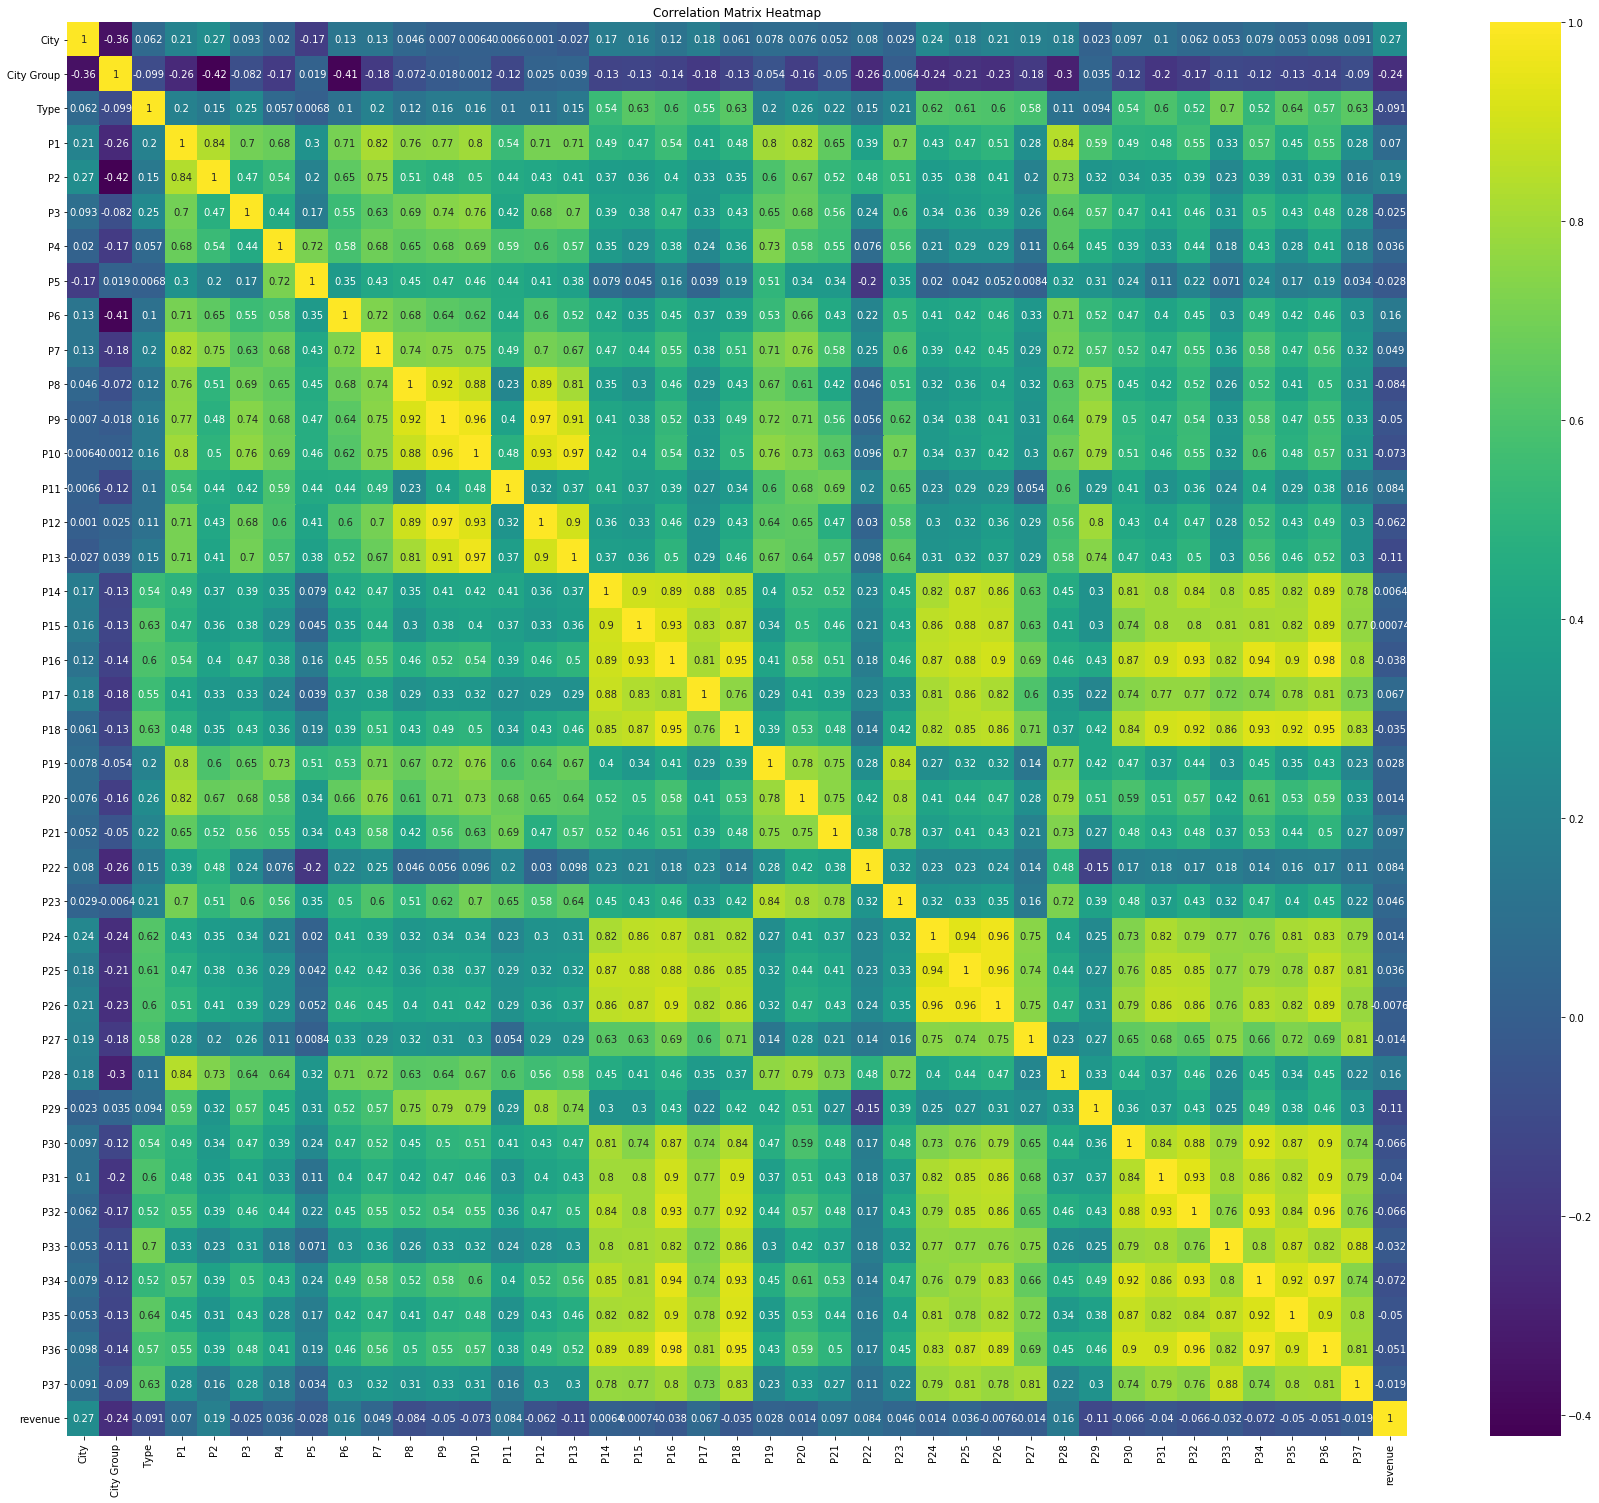

In [17]:
plt.figure(figsize=(30, 26))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Stripplot Visualization

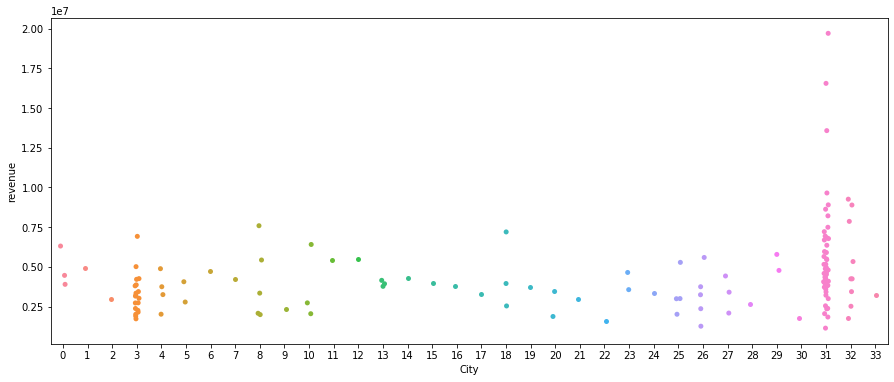

In [18]:
plt.figure(figsize=(15, 6))
sns.stripplot(data=data, x="City", y="revenue")
plt.show()

# Distribution of Revenue

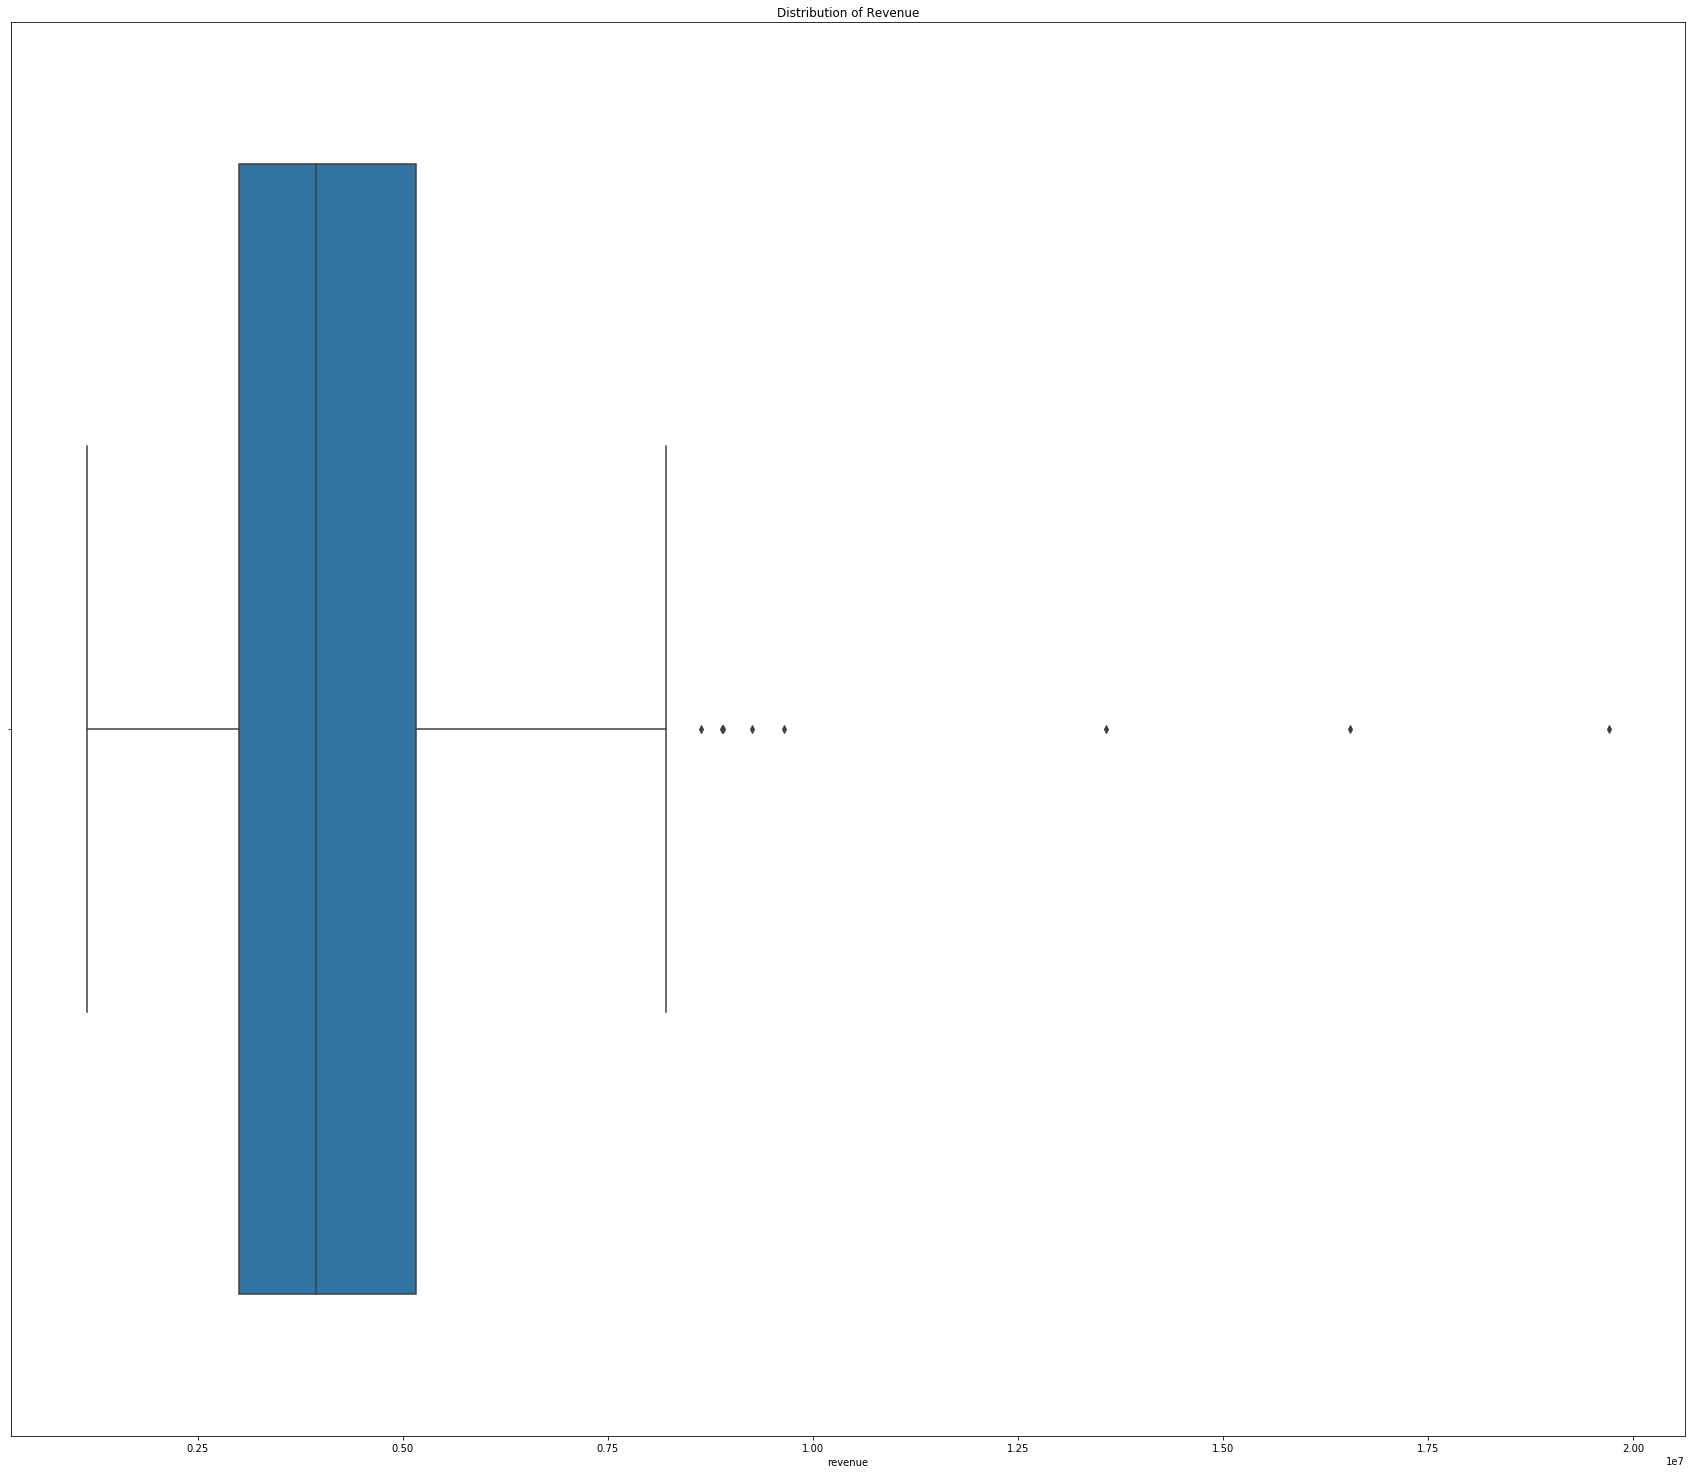

In [19]:
plt.figure(figsize=(30, 26))
sns.boxplot(x=data["revenue"])
plt.title('Distribution of Revenue')
plt.show()

# Separate X and Y

In [20]:
X = data.drop(["revenue"], axis=1)
y = data["revenue"]

# Perform feature selection

In [21]:
from sklearn import feature_selection

chi_2 = feature_selection.chi2(X,y)
chi_2

(array([ 921.0905874 ,   78.        ,   24.87755102,  286.94545455,
          70.79304636,   33.56973795,   32.13772955,   99.13454545,
         172.45814978,  129.29539295,   91.16147309,   84.08042895,
          84.57446809,  152.18344519,   96.75482094,   28.76149425,
         715.56701031,  564.22105263,  860.90225564,  541.07042254,
         763.04511278,  870.88095238,  411.2070626 ,  252.41800643,
          92.52459016,  825.92750533,  526.14893617,  510.74698795,
         630.86848635,  507.05732484,  224.9592299 ,  122.5669383 ,
        1527.14973262,  863.9924812 , 1473.01156069,  344.57692308,
        1457.67741935,  791.38848921, 1068.35643564,  390.52287582]),
 array([8.57254041e-117, 9.99983676e-001, 1.00000000e+000, 7.95646847e-013,
        9.99999261e-001, 1.00000000e+000, 1.00000000e+000, 9.92561870e-001,
        1.88194262e-002, 6.45351594e-001, 9.98859517e-001, 9.99858092e-001,
        9.99833513e-001, 1.62338894e-001, 9.95544404e-001, 1.00000000e+000,
        1.7255

# Split the data into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import the standard ML Libraries

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier

In [24]:
lr = LinearRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBRegressor()

In [25]:
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
dt.fit(X_train,y_train)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

# Predict the target variable for the testing data

In [26]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([ 2032251.86084506, -3425655.96030174,  1601669.67695573,
        4343434.61227812,  4349290.80027672,  3881102.70130017,
        6977433.89568348,  2898707.25503596,  5253887.70270765,
        4746666.72840196,  1544486.64062532, -1315568.22986597,
        3896723.40330273,  7381975.0283368 ,  1308487.53792978,
        3697234.80608991,  4142503.65632051,  4116065.99409956,
        3949644.5016374 ,  4235937.03562704, -5417728.2529458 ,
        2556768.34503454,  4456756.01713704,  2600396.73938242,
        4527256.20881386,  5106072.62655552,  4580013.8635272 ,
        4099216.44913105])

In [27]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([ 2025297,  6313221,  4590423,  2156098,  3008199,  3807496,
        4136425,  3218918,  8894598,  5461700,  4250758,  3956086,
        2371202, 16549064,  3600467,  3745135,  7201784,  2999068,
        3261924,  4491607,  5500818,  5286212,  3199619,  3982767,
        4952497,  4807746,  5461700,  4250758], dtype=int64)

In [28]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1756069, 6313221, 4651866, 4705945, 3008199, 4651866, 4136425,
       4136425, 4100886, 5461700, 3871344, 5017319, 1999097, 4491607,
       3818055, 2083447, 7201784, 1149870, 2738052, 1149870, 4286645,
       5525735, 6363241, 3258837, 1756069, 4807746, 5461700, 5653753],
      dtype=int64)

In [29]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([2554292. , 4114452.2, 2761789.2, 4123065.2, 3344274.8, 3394661.2,
       3786302. , 3490750.5, 7454850.5, 5242043.5, 2495299. , 3985548. ,
       2861317.5, 6931309.5, 4688371.5, 5025959. , 5931208.5, 4013964. ,
       3185530. , 4124806.8, 3585473.2, 3156701.8, 2420692. , 4820962. ,
       3007823.2, 5176372. , 5461535. , 2277778.5], dtype=float32)

# Evaluate the models

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_lr = mean_squared_error(y_pred_lr,y_test)
mean_squared_lr

19299362134048.965

In [31]:
mean_squared_rf = mean_squared_error(y_pred_rf,y_test)
mean_squared_rf

15731040720162.535

In [32]:
mean_squared_dt = mean_squared_error(y_pred_dt,y_test)
mean_squared_dt

11609415962506.322

In [33]:
mean_squared_xgb = mean_squared_error(y_pred_xgb,y_test)
mean_squared_xgb

10499459350971.2

In [34]:
mean_squared = [mean_squared_lr, mean_squared_rf, mean_squared_dt, mean_squared_xgb]
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'XGBRegressor']

# Finding the best model

In [35]:
best_model = models[mean_squared.index(max(mean_squared))]

print("Best Model:", best_model)
print("Mean_Squared:", max(mean_squared))

Best Model: Linear Regression
Mean_Squared: 19299362134048.965


# Visualization

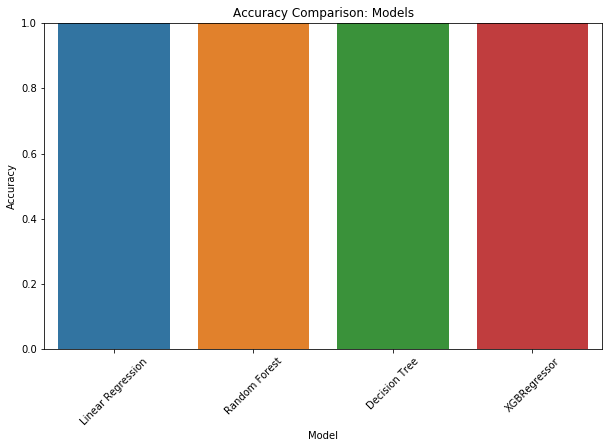

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mean_squared)
plt.title('Accuracy Comparison: Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()